In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Canticos_1 = "The song of songs, which is Solomon'.Let him kiss me with the kisses of his mouth: for your love is better than wine.Because of the smell of your good ointments your name is as ointment poured forth, therefore do the virgins love you.Draw me, we will run after you: the king has brought me into his chambers: we will be glad and rejoice in you, we will remember your love more than wine: the upright love you.I am black, but comely, O you daughters of Jerusalem, as the tents of Kedar, as the curtains of Solomon.Look not on me, because I am black, because the sun has looked on me: my mother' children were angry with me; they made me the keeper of the vineyards; but my own vineyard have I not kept.Tell me, O you whom my soul loves, where you feed, where you make your flock to rest at noon: for why should I be as one that turns aside by the flocks of your companions?If you know not, O you fairest among women, go your way forth by the footsteps of the flock, and feed your kids beside the shepherds'tents.I have compared you, O my love, to a company of horses in Pharaoh' chariots.Your cheeks are comely with rows of jewels, your neck with chains of gold.We will make you borders of gold with studs of silver.While the king sits at his table, my spikenard sends forth the smell thereof.A bundle of myrrh is my well-beloved to me; he shall lie all night between my breasts.My beloved is to me as a cluster of camphire in the vineyards of Engedi.Behold, you are fair, my love; behold, you are fair; you have doves'eyes.Behold, you are fair, my beloved, yes, pleasant: also our bed is green.The beams of our house are cedar, and our rafters of fir.".lower()

In [6]:
Canticos_2 = "I am the rose of Sharon, and the lily of the valleys.As the lily among thorns, so is my love among the daughters.As the apple tree among the trees of the wood, so is my beloved among the sons. I sat down under his shadow with great delight, and his fruit was sweet to my taste.He brought me to the banqueting house, and his banner over me was love.Stay me with flagons, comfort me with apples: for I am sick of love.His left hand is under my head, and his right hand does embrace me.I charge you, O you daughters of Jerusalem, by the roes, and by the hinds of the field, that you stir not up, nor awake my love, till he please.The voice of my beloved! behold, he comes leaping on the mountains, skipping on the hills.My beloved is like a roe or a young hart: behold, he stands behind our wall, he looks forth at the windows, showing himself through the lattice.My beloved spoke, and said to me, Rise up, my love, my fair one, and come away.For, see, the winter is past, the rain is over and gone;The flowers appear on the earth; the time of the singing of birds is come, and the voice of the turtle is heard in our land;The fig tree puts forth her green figs, and the vines with the tender grape give a good smell. Arise, my love, my fair one, and come away.O my dove, that are in the clefts of the rock, in the secret places of the stairs, let me see your countenance, let me hear your voice; for sweet is your voice, and your countenance is comely.Take us the foxes, the little foxes, that spoil the vines: for our vines have tender grapes.My beloved is mine, and I am his: he feeds among the lilies.Until the day break, and the shadows flee away, turn, my beloved, and be you like a roe or a young hart on the mountains of Bether.".lower()

In [7]:
Canticos_3 = "By night on my bed I sought him whom my soul loves: I sought him, but I found him not.I will rise now, and go about the city in the streets, and in the broad ways I will seek him whom my soul loves: I sought him, but I found him not.The watchmen that go about the city found me: to whom I said, Saw you him whom my soul loves?It was but a little that I passed from them, but I found him whom my soul loves: I held him, and would not let him go, until I had brought him into my mother' house, and into the chamber of her that conceived me.I charge you, O you daughters of Jerusalem, by the roes, and by the hinds of the field, that you stir not up, nor awake my love, till he please.Who is this that comes out of the wilderness like pillars of smoke, perfumed with myrrh and frankincense, with all powders of the merchant?Behold his bed, which is Solomon'; three score valiant men are about it, of the valiant of Israel.They all hold swords, being expert in war: every man has his sword on his thigh because of fear in the night.King Solomon made himself a chariot of the wood of Lebanon.He made the pillars thereof of silver, the bottom thereof of gold, the covering of it of purple, the middle thereof being paved with love, for the daughters of Jerusalem.Go forth, O you daughters of Zion, and behold king Solomon with the crown with which his mother crowned him in the day of his espousals, and in the day of the gladness of his heart.".lower()

In [8]:
Canticos_4 = "Behold, you are fair, my love; behold, you are fair; you have doves'eyes within your locks: your hair is as a flock of goats, that appear from mount Gilead.Your teeth are like a flock of sheep that are even shorn, which came up from the washing; whereof every one bear twins, and none is barren among them.Your lips are like a thread of scarlet, and your speech is comely: your temples are like a piece of a pomegranate within your locks.Your neck is like the tower of David built for an armory, where on there hang a thousand bucklers, all shields of mighty men.Your two breasts are like two young roes that are twins, which feed among the lilies.Until the day break, and the shadows flee away, I will get me to the mountain of myrrh, and to the hill of frankincense.You are all fair, my love; there is no spot in you.Come with me from Lebanon, my spouse, with me from Lebanon: look from the top of Amana, from the top of Shenir and Hermon, from the lions'dens, from the mountains of the leopards.You have ravished my heart, my sister, my spouse; you have ravished my heart with one of your eyes, with one chain of your neck.How fair is your love, my sister, my spouse! how much better is your love than wine! and the smell of your ointments than all spices!Your lips, O my spouse, drop as the honeycomb: honey and milk are under your tongue; and the smell of your garments is like the smell of Lebanon.A garden enclosed is my sister, my spouse; a spring shut up, a fountain sealed.Your plants are an orchard of pomegranates, with pleasant fruits; camphire, with spikenard,Spikenard and saffron; calamus and cinnamon, with all trees of frankincense; myrrh and aloes, with all the chief spices:A fountain of gardens, a well of living waters, and streams from Lebanon.Awake, O north wind; and come, you south; blow on my garden, that the spices thereof may flow out. Let my beloved come into his garden, and eat his pleasant fruits.".lower()

In [9]:
Canticos_5 = "I am come into my garden, my sister, my spouse: I have gathered my myrrh with my spice; I have eaten my honeycomb with my honey; I have drunk my wine with my milk: eat, O friends; drink, yes, drink abundantly, O beloved.I sleep, but my heart wakes: it is the voice of my beloved that knocks, saying, Open to me, my sister, my love, my dove, my undefiled: for my head is filled with dew, and my locks with the drops of the night.I have put off my coat; how shall I put it on? I have washed my feet; how shall I defile them?My beloved put in his hand by the hole of the door, and my bowels were moved for him.I rose up to open to my beloved; and my hands dropped with myrrh, and my fingers with sweet smelling myrrh, on the handles of the lock.I opened to my beloved; but my beloved had withdrawn himself, and was gone: my soul failed when he spoke: I sought him, but I could not find him; I called him, but he gave me no answer.The watchmen that went about the city found me, they smote me, they wounded me; the keepers of the walls took away my veil from me.I charge you, O daughters of Jerusalem, if you find my beloved, that you tell him, that I am sick of love.What is your beloved more than another beloved, O you fairest among women? what is your beloved more than another beloved, that you do so charge us?My beloved is white and ruddy, the most chief among ten thousand.His head is as the most fine gold, his locks are bushy, and black as a raven.His eyes are as the eyes of doves by the rivers of waters, washed with milk, and fitly set.His cheeks are as a bed of spices, as sweet flowers: his lips like lilies, dropping sweet smelling myrrh.His hands are as gold rings set with the beryl: his belly is as bright ivory overlaid with sapphires.His legs are as pillars of marble, set on sockets of fine gold: his countenance is as Lebanon, excellent as the cedars.His mouth is most sweet: yes, he is altogether lovely. This is my beloved, and this is my friend, O daughters of Jerusalem.".lower()

In [10]:
Canticos_6 = "Where is your beloved gone, O you fairest among women? where is your beloved turned aside? that we may seek him with you.My beloved is gone down into his garden, to the beds of spices, to feed in the gardens, and to gather lilies.I am my beloved', and my beloved is mine: he feeds among the lilies.You are beautiful, O my love, as Tirzah, comely as Jerusalem, terrible as an army with banners.Turn away your eyes from me, for they have overcome me: your hair is as a flock of goats that appear from Gilead.Your teeth are as a flock of sheep which go up from the washing, whereof every one bears twins, and there is not one barren among them.As a piece of a pomegranate are your temples within your locks.There are three score queens, and fourscore concubines, and virgins without number.My dove, my undefiled is but one; she is the only one of her mother, she is the choice one of her that bore her. The daughters saw her, and blessed her; yes, the queens and the concubines, and they praised her.Who is she that looks forth as the morning, fair as the moon, clear as the sun, and terrible as an army with banners?I went down into the garden of nuts to see the fruits of the valley, and to see whether the vine flourished and the pomegranates budded.Or ever I was aware, my soul made me like the chariots of Amminadib.Return, return, O Shulamite; return, return, that we may look on you. What will you see in the Shulamite? As it were the company of two armies.".lower()

In [11]:
Canticos_7 = "How beautiful are your feet with shoes, O prince' daughter! the joints of your thighs are like jewels, the work of the hands of a cunning workman.Your navel is like a round goblet, which wants not liquor: your belly is like an heap of wheat set about with lilies.Your two breasts are like two young roes that are twins.Your neck is as a tower of ivory; your eyes like the fish pools in Heshbon, by the gate of Bathrabbim: your nose is as the tower of Lebanon which looks toward Damascus.Your head on you is like Carmel, and the hair of your head like purple; the king is held in the galleries.How fair and how pleasant are you, O love, for delights!This your stature is like to a palm tree, and your breasts to clusters of grapes.I said, I will go up to the palm tree, I will take hold of the boughs thereof: now also your breasts shall be as clusters of the vine, and the smell of your nose like apples;And the roof of your mouth like the best wine for my beloved, that goes down sweetly, causing the lips of those that are asleep to speak.I am my beloved', and his desire is toward me.Come, my beloved, let us go forth into the field; let us lodge in the villages.Let us get up early to the vineyards; let us see if the vine flourish, whether the tender grape appear, and the pomegranates bud forth: there will I give you my loves.The mandrakes give a smell, and at our gates are all manner of pleasant fruits, new and old, which I have laid up for you, O my beloved.".lower()

In [60]:
Canticos_8 = "O that you were as my brother, that sucked the breasts of my mother! when I should find you without, I would kiss you; yes, I should not be despised.I would lead you, and bring you into my mother' house, who would instruct me: I would cause you to drink of spiced wine of the juice of my pomegranate.His left hand should be under my head, and his right hand should embrace me.I charge you, O daughters of Jerusalem, that you stir not up, nor awake my love, until he please.Who is this that comes up from the wilderness, leaning on her beloved? I raised you up under the apple tree: there your mother brought you forth: there she brought you forth that bore you.Set me as a seal on your heart, as a seal on your arm: for love is strong as death; jealousy is cruel as the grave: the coals thereof are coals of fire, which has a most vehement flame.Many waters cannot quench love, neither can the floods drown it: if a man would give all the substance of his house for love, it would utterly be contemned.We have a little sister, and she has no breasts: what shall we do for our sister in the day when she shall be spoken for?If she be a wall, we will build on her a palace of silver: and if she be a door, we will enclose her with boards of cedar.I am a wall, and my breasts like towers: then was I in his eyes as one that found favor.Solomon had a vineyard at Baalhamon; he let out the vineyard to keepers; every one for the fruit thereof was to bring a thousand pieces of silver.My vineyard, which is mine, is before me: you, O Solomon, must have a thousand, and those that keep the fruit thereof two hundred.You that dwell in the gardens, the companions listen to your voice: cause me to hear it.Make haste, my beloved, and be you like to a roe or to a young hart on the mountains of spices.".lower()

In [61]:
tokens = nltk.word_tokenize(Canticos_8)

In [62]:
stop_words = set(stopwords.words('english'))

In [63]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [64]:
print(filtered_sentence1)

['brother', ',', 'sucked', 'breasts', 'mother', '!', 'find', 'without', ',', 'would', 'kiss', ';', 'yes', ',', 'despised.i', 'would', 'lead', ',', 'bring', 'mother', "'", 'house', ',', 'would', 'instruct', ':', 'would', 'cause', 'drink', 'spiced', 'wine', 'juice', 'pomegranate.his', 'left', 'hand', 'head', ',', 'right', 'hand', 'embrace', 'me.i', 'charge', ',', 'daughters', 'jerusalem', ',', 'stir', ',', 'awake', 'love', ',', 'please.who', 'comes', 'wilderness', ',', 'leaning', 'beloved', '?', 'raised', 'apple', 'tree', ':', 'mother', 'brought', 'forth', ':', 'brought', 'forth', 'bore', 'you.set', 'seal', 'heart', ',', 'seal', 'arm', ':', 'love', 'strong', 'death', ';', 'jealousy', 'cruel', 'grave', ':', 'coals', 'thereof', 'coals', 'fire', ',', 'vehement', 'flame.many', 'waters', 'quench', 'love', ',', 'neither', 'floods', 'drown', ':', 'man', 'would', 'give', 'substance', 'house', 'love', ',', 'would', 'utterly', 'contemned.we', 'little', 'sister', ',', 'breasts', ':', 'shall', 'sist

In [65]:
data =np.array([["Canticos_1", "'song', 'songs', ',', solomon'.let, 'kiss', 'kisses', 'mouth', ':', 'love', 'better', 'wine.because', 'smell', 'good', 'ointments', 'name', 'ointment', 'poured', 'forth', ',', 'therefore', 'virgins', 'love', 'you.draw', ',', 'run', ':', 'king', 'brought', 'chambers', ':', 'glad', 'rejoice', ',', 'remember', 'love', 'wine', ':', 'upright', 'love', 'you.i', 'black', ',', 'comely', ',', 'daughters', 'jerusalem', ',', 'tents', 'kedar', ',', 'curtains', 'solomon.look', ',', 'black', ',', 'sun', 'looked', ':', 'mother', ', 'children', 'angry', ';', 'made', 'keeper', 'vineyards', ';', 'vineyard', 'kept.tell', ',', 'soul', 'loves', ',', 'feed', ',', 'make', 'flock', 'rest', 'noon', ':', 'one', 'turns', 'aside', 'flocks', 'companions', '?', 'know', ',', 'fairest', 'among', 'women', ',', 'go', 'way', 'forth', 'footsteps', 'flock', ',', 'feed', 'kids', 'beside', shepherds'tents.i, 'compared', ',', 'love', ',', 'company', 'horses', 'pharaoh', ', 'chariots.your', 'cheeks', 'comely', 'rows', 'jewels', ',', 'neck', 'chains', 'gold.we', 'make', 'borders', 'gold', 'studs', 'silver.while', 'king', 'sits', 'table', ',', 'spikenard', 'sends', 'forth', 'smell', 'thereof.a', 'bundle', 'myrrh', 'well-beloved', ';', 'shall', 'lie', 'night', 'breasts.my', 'beloved', 'cluster', 'camphire', 'vineyards', 'engedi.behold', ',', 'fair', ',', 'love', ';', 'behold', ',', 'fair', ';', doves'eyes.behold, ',', 'fair', ',', 'beloved', ',', 'yes', ',', 'pleasant', ':', 'also', 'bed', 'green.the', 'beams', 'house', 'cedar', ',', 'rafters', 'fir', '.'"],
               ["Canticos_2", "'rose', 'sharon', ',', 'lily', 'valleys.as', 'lily', 'among', 'thorns', ',', 'love', 'among', 'daughters.as', 'apple', 'tree', 'among', 'trees', 'wood', ',', 'beloved', 'among', 'sons', '.', 'sat', 'shadow', 'great', 'delight', ',', 'fruit', 'sweet', 'taste.he', 'brought', 'banqueting', 'house', ',', 'banner', 'love.stay', 'flagons', ',', 'comfort', 'apples', ':', 'sick', 'love.his', 'left', 'hand', 'head', ',', 'right', 'hand', 'embrace', 'me.i', 'charge', ',', 'daughters', 'jerusalem', ',', 'roes', ',', 'hinds', 'field', ',', 'stir', ',', 'awake', 'love', ',', 'till', 'please.the', 'voice', 'beloved', '!', 'behold', ',', 'comes', 'leaping', 'mountains', ',', 'skipping', 'hills.my', 'beloved', 'like', 'roe', 'young', 'hart', ':', 'behold', ',', 'stands', 'behind', 'wall', ',', 'looks', 'forth', 'windows', ',', 'showing', 'lattice.my', 'beloved', 'spoke', ',', 'said', ',', 'rise', ',', 'love', ',', 'fair', 'one', ',', 'come', 'away.for', ',', 'see', ',', 'winter', 'past', ',', 'rain', 'gone', ';', 'flowers', 'appear', 'earth', ';', 'time', 'singing', 'birds', 'come', ',', 'voice', 'turtle', 'heard', 'land', ';', 'fig', 'tree', 'puts', 'forth', 'green', 'figs', ',', 'vines', 'tender', 'grape', 'give', 'good', 'smell', '.', 'arise', ',', 'love', ',', 'fair', 'one', ',', 'come', 'away.o', 'dove', ',', 'clefts', 'rock', ',', 'secret', 'places', 'stairs', ',', 'let', 'see', 'countenance', ',', 'let', 'hear', 'voice', ';', 'sweet', 'voice', ',', 'countenance', 'comely.take', 'us', 'foxes', ',', 'little', 'foxes', ',', 'spoil', 'vines', ':', 'vines', 'tender', 'grapes.my', 'beloved', 'mine', ',', ':', 'feeds', 'among', 'lilies.until', 'day', 'break', ',', 'shadows', 'flee', 'away', ',', 'turn', ',', 'beloved', ',', 'like', 'roe', 'young', 'hart', 'mountains', 'bether', '.'"],
               ["Canticos_3", "'night', 'bed', 'sought', 'soul', 'loves', ':', 'sought', ',', 'found', 'not.i', 'rise', ',', 'go', 'city', 'streets', ',', 'broad', 'ways', 'seek', 'soul', 'loves', ':', 'sought', ',', 'found', 'not.the', 'watchmen', 'go', 'city', 'found', ':', 'said', ',', 'saw', 'soul', 'loves', '?', 'little', 'passed', ',', 'found', 'soul', 'loves', ':', 'held', ',', 'would', 'let', 'go', ',', 'brought', 'mother', ', 'house', ',', 'chamber', 'conceived', 'me.i', 'charge', ',', 'daughters', 'jerusalem', ',', 'roes', ',', 'hinds', 'field', ',', 'stir', ',', 'awake', 'love', ',', 'till', 'please.who', 'comes', 'wilderness', 'like', 'pillars', 'smoke', ',', 'perfumed', 'myrrh', 'frankincense', ',', 'powders', 'merchant', '?', 'behold', 'bed', ',', 'solomon', ', ';', 'three', 'score', 'valiant', 'men', ',', 'valiant', 'israel.they', 'hold', 'swords', ',', 'expert', 'war', ':', 'every', 'man', 'sword', 'thigh', 'fear', 'night.king', 'solomon', 'made', 'chariot', 'wood', 'lebanon.he', 'made', 'pillars', 'thereof', 'silver', ',', 'bottom', 'thereof', 'gold', ',', 'covering', 'purple', ',', 'middle', 'thereof', 'paved', 'love', ',', 'daughters', 'jerusalem.go', 'forth', ',', 'daughters', 'zion', ',', 'behold', 'king', 'solomon', 'crown', 'mother', 'crowned', 'day', 'espousals', ',', 'day', 'gladness', 'heart', '.'"],
               ["Canticos_4", "'behold', ',', 'fair', ',', 'love', ';', 'behold', ',', 'fair', ';', doves'eyes, 'within', 'locks', ':', 'hair', 'flock', 'goats', ',', 'appear', 'mount', 'gilead.your', 'teeth', 'like', 'flock', 'sheep', 'even', 'shorn', ',', 'came', 'washing', ';', 'whereof', 'every', 'one', 'bear', 'twins', ',', 'none', 'barren', 'among', 'them.your', 'lips', 'like', 'thread', 'scarlet', ',', 'speech', 'comely', ':', 'temples', 'like', 'piece', 'pomegranate', 'within', 'locks.your', 'neck', 'like', 'tower', 'david', 'built', 'armory', ',', 'hang', 'thousand', 'bucklers', ',', 'shields', 'mighty', 'men.your', 'two', 'breasts', 'like', 'two', 'young', 'roes', 'twins', ',', 'feed', 'among', 'lilies.until', 'day', 'break', ',', 'shadows', 'flee', 'away', ',', 'get', 'mountain', 'myrrh', ',', 'hill', 'frankincense.you', 'fair', ',', 'love', ';', 'spot', 'you.come', 'lebanon', ',', 'spouse', ',', 'lebanon', ':', 'look', 'top', 'amana', ',', 'top', 'shenir', 'hermon', ',', lions'dens, ',', 'mountains', 'leopards.you', 'ravished', 'heart', ',', 'sister', ',', 'spouse', ';', 'ravished', 'heart', 'one', 'eyes', ',', 'one', 'chain', 'neck.how', 'fair', 'love', ',', 'sister', ',', 'spouse', '!', 'much', 'better', 'love', 'wine', '!', 'smell', 'ointments', 'spices', '!', 'lips', ',', 'spouse', ',', 'drop', 'honeycomb', ':', 'honey', 'milk', 'tongue', ';', 'smell', 'garments', 'like', 'smell', 'lebanon.a', 'garden', 'enclosed', 'sister', ',', 'spouse', ';', 'spring', 'shut', ',', 'fountain', 'sealed.your', 'plants', 'orchard', 'pomegranates', ',', 'pleasant', 'fruits', ';', 'camphire', ',', 'spikenard', ',', 'spikenard', 'saffron', ';', 'calamus', 'cinnamon', ',', 'trees', 'frankincense', ';', 'myrrh', 'aloes', ',', 'chief', 'spices', ':', 'fountain', 'gardens', ',', 'well', 'living', 'waters', ',', 'streams', 'lebanon.awake', ',', 'north', 'wind', ';', 'come', ',', 'south', ';', 'blow', 'garden', ',', 'spices', 'thereof', 'may', 'flow', '.', 'let', 'beloved', 'come', 'garden', ',', 'eat', 'pleasant', 'fruits', '.'"],
               ["Canticos_5", "'come', 'garden', ',', 'sister', ',', 'spouse', ':', 'gathered', 'myrrh', 'spice', ';', 'eaten', 'honeycomb', 'honey', ';', 'drunk', 'wine', 'milk', ':', 'eat', ',', 'friends', ';', 'drink', ',', 'yes', ',', 'drink', 'abundantly', ',', 'beloved.i', 'sleep', ',', 'heart', 'wakes', ':', 'voice', 'beloved', 'knocks', ',', 'saying', ',', 'open', ',', 'sister', ',', 'love', ',', 'dove', ',', 'undefiled', ':', 'head', 'filled', 'dew', ',', 'locks', 'drops', 'night.i', 'put', 'coat', ';', 'shall', 'put', '?', 'washed', 'feet', ';', 'shall', 'defile', '?', 'beloved', 'put', 'hand', 'hole', 'door', ',', 'bowels', 'moved', 'him.i', 'rose', 'open', 'beloved', ';', 'hands', 'dropped', 'myrrh', ',', 'fingers', 'sweet', 'smelling', 'myrrh', ',', 'handles', 'lock.i', 'opened', 'beloved', ';', 'beloved', 'withdrawn', ',', 'gone', ':', 'soul', 'failed', 'spoke', ':', 'sought', ',', 'could', 'find', ';', 'called', ',', 'gave', 'answer.the', 'watchmen', 'went', 'city', 'found', ',', 'smote', ',', 'wounded', ';', 'keepers', 'walls', 'took', 'away', 'veil', 'me.i', 'charge', ',', 'daughters', 'jerusalem', ',', 'find', 'beloved', ',', 'tell', ',', 'sick', 'love.what', 'beloved', 'another', 'beloved', ',', 'fairest', 'among', 'women', '?', 'beloved', 'another', 'beloved', ',', 'charge', 'us', '?', 'beloved', 'white', 'ruddy', ',', 'chief', 'among', 'ten', 'thousand.his', 'head', 'fine', 'gold', ',', 'locks', 'bushy', ',', 'black', 'raven.his', 'eyes', 'eyes', 'doves', 'rivers', 'waters', ',', 'washed', 'milk', ',', 'fitly', 'set.his', 'cheeks', 'bed', 'spices', ',', 'sweet', 'flowers', ':', 'lips', 'like', 'lilies', ',', 'dropping', 'sweet', 'smelling', 'myrrh.his', 'hands', 'gold', 'rings', 'set', 'beryl', ':', 'belly', 'bright', 'ivory', 'overlaid', 'sapphires.his', 'legs', 'pillars', 'marble', ',', 'set', 'sockets', 'fine', 'gold', ':', 'countenance', 'lebanon', ',', 'excellent', 'cedars.his', 'mouth', 'sweet', ':', 'yes', ',', 'altogether', 'lovely', '.', 'beloved', ',', 'friend', ',', 'daughters', 'jerusalem', '.'"],
               ["Canticos_6", "'beloved', 'gone', ',', 'fairest', 'among', 'women', '?', 'beloved', 'turned', 'aside', '?', 'may', 'seek', 'you.my', 'beloved', 'gone', 'garden', ',', 'beds', 'spices', ',', 'feed', 'gardens', ',', 'gather', 'lilies.i', 'beloved', ', ',', 'beloved', 'mine', ':', 'feeds', 'among', 'lilies.you', 'beautiful', ',', 'love', ',', 'tirzah', ',', 'comely', 'jerusalem', ',', 'terrible', 'army', 'banners.turn', 'away', 'eyes', ',', 'overcome', ':', 'hair', 'flock', 'goats', 'appear', 'gilead.your', 'teeth', 'flock', 'sheep', 'go', 'washing', ',', 'whereof', 'every', 'one', 'bears', 'twins', ',', 'one', 'barren', 'among', 'them.as', 'piece', 'pomegranate', 'temples', 'within', 'locks.there', 'three', 'score', 'queens', ',', 'fourscore', 'concubines', ',', 'virgins', 'without', 'number.my', 'dove', ',', 'undefiled', 'one', ';', 'one', 'mother', ',', 'choice', 'one', 'bore', '.', 'daughters', 'saw', ',', 'blessed', ';', 'yes', ',', 'queens', 'concubines', ',', 'praised', 'her.who', 'looks', 'forth', 'morning', ',', 'fair', 'moon', ',', 'clear', 'sun', ',', 'terrible', 'army', 'banners', '?', 'went', 'garden', 'nuts', 'see', 'fruits', 'valley', ',', 'see', 'whether', 'vine', 'flourished', 'pomegranates', 'budded.or', 'ever', 'aware', ',', 'soul', 'made', 'like', 'chariots', 'amminadib.return', ',', 'return', ',', 'shulamite', ';', 'return', ',', 'return', ',', 'may', 'look', '.', 'see', 'shulamite', '?', 'company', 'two', 'armies', '.'"],
               ["Canticos_7", "'beautiful', 'feet', 'shoes', ',', 'prince', ', 'daughter', '!', 'joints', 'thighs', 'like', 'jewels', ',', 'work', 'hands', 'cunning', 'workman.your', 'navel', 'like', 'round', 'goblet', ',', 'wants', 'liquor', ':', 'belly', 'like', 'heap', 'wheat', 'set', 'lilies.your', 'two', 'breasts', 'like', 'two', 'young', 'roes', 'twins.your', 'neck', 'tower', 'ivory', ';', 'eyes', 'like', 'fish', 'pools', 'heshbon', ',', 'gate', 'bathrabbim', ':', 'nose', 'tower', 'lebanon', 'looks', 'toward', 'damascus.your', 'head', 'like', 'carmel', ',', 'hair', 'head', 'like', 'purple', ';', 'king', 'held', 'galleries.how', 'fair', 'pleasant', ',', 'love', ',', 'delights', '!', 'stature', 'like', 'palm', 'tree', ',', 'breasts', 'clusters', 'grapes.i', 'said', ',', 'go', 'palm', 'tree', ',', 'take', 'hold', 'boughs', 'thereof', ':', 'also', 'breasts', 'shall', 'clusters', 'vine', ',', 'smell', 'nose', 'like', 'apples', ';', 'roof', 'mouth', 'like', 'best', 'wine', 'beloved', ',', 'goes', 'sweetly', ',', 'causing', 'lips', 'asleep', 'speak.i', 'beloved', ', ',', 'desire', 'toward', 'me.come', ',', 'beloved', ',', 'let', 'us', 'go', 'forth', 'field', ';', 'let', 'us', 'lodge', 'villages.let', 'us', 'get', 'early', 'vineyards', ';', 'let', 'us', 'see', 'vine', 'flourish', ',', 'whether', 'tender', 'grape', 'appear', ',', 'pomegranates', 'bud', 'forth', ':', 'give', 'loves.the', 'mandrakes', 'give', 'smell', ',', 'gates', 'manner', 'pleasant', 'fruits', ',', 'new', 'old', ',', 'laid', ',', 'beloved', '.'"],
               ["Canticos_8", "'brother', ',', 'sucked', 'breasts', 'mother', '!', 'find', 'without', ',', 'would', 'kiss', ';', 'yes', ',', 'despised.i', 'would', 'lead', ',', 'bring', 'mother', ', 'house', ',', 'would', 'instruct', ':', 'would', 'cause', 'drink', 'spiced', 'wine', 'juice', 'pomegranate.his', 'left', 'hand', 'head', ',', 'right', 'hand', 'embrace', 'me.i', 'charge', ',', 'daughters', 'jerusalem', ',', 'stir', ',', 'awake', 'love', ',', 'please.who', 'comes', 'wilderness', ',', 'leaning', 'beloved', '?', 'raised', 'apple', 'tree', ':', 'mother', 'brought', 'forth', ':', 'brought', 'forth', 'bore', 'you.set', 'seal', 'heart', ',', 'seal', 'arm', ':', 'love', 'strong', 'death', ';', 'jealousy', 'cruel', 'grave', ':', 'coals', 'thereof', 'coals', 'fire', ',', 'vehement', 'flame.many', 'waters', 'quench', 'love', ',', 'neither', 'floods', 'drown', ':', 'man', 'would', 'give', 'substance', 'house', 'love', ',', 'would', 'utterly', 'contemned.we', 'little', 'sister', ',', 'breasts', ':', 'shall', 'sister', 'day', 'shall', 'spoken', '?', 'wall', ',', 'build', 'palace', 'silver', ':', 'door', ',', 'enclose', 'boards', 'cedar.i', 'wall', ',', 'breasts', 'like', 'towers', ':', 'eyes', 'one', 'found', 'favor.solomon', 'vineyard', 'baalhamon', ';', 'let', 'vineyard', 'keepers', ';', 'every', 'one', 'fruit', 'thereof', 'bring', 'thousand', 'pieces', 'silver.my', 'vineyard', ',', 'mine', ',', ':', ',', 'solomon', ',', 'must', 'thousand', ',', 'keep', 'fruit', 'thereof', 'two', 'hundred.you', 'dwell', 'gardens', ',', 'companions', 'listen', 'voice', ':', 'cause', 'hear', 'it.make', 'haste', ',', 'beloved', ',', 'like', 'roe', 'young', 'hart', 'mountains', 'spices', '.'"]])

In [66]:
df = pd.DataFrame(data, index=range(100,108),columns=['Autor', 'Livro'])

In [67]:
print(df)

          Autor                                              Livro
100  Canticos_1  'song', 'songs', ',', solomon'.let, 'kiss', 'k...
101  Canticos_2  'rose', 'sharon', ',', 'lily', 'valleys.as', '...
102  Canticos_3  'night', 'bed', 'sought', 'soul', 'loves', ':'...
103  Canticos_4  'behold', ',', 'fair', ',', 'love', ';', 'beho...
104  Canticos_5  'come', 'garden', ',', 'sister', ',', 'spouse'...
105  Canticos_6  'beloved', 'gone', ',', 'fairest', 'among', 'w...
106  Canticos_7  'beautiful', 'feet', 'shoes', ',', 'prince', '...
107  Canticos_8  'brother', ',', 'sucked', 'breasts', 'mother',...


In [68]:
corpus = df['Livro'].tolist()

In [69]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

8 rows


,0,1,2,3,4,5,6,7
also bed green,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among women go,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
angry made keeper,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aside flocks companions,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beams house cedar,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
because smell good,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bed green the,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behold fair beloved,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beloved cluster camphire,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beloved shall lie,0.083908,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [71]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [72]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


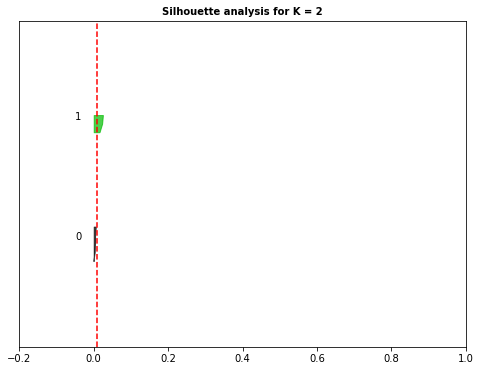

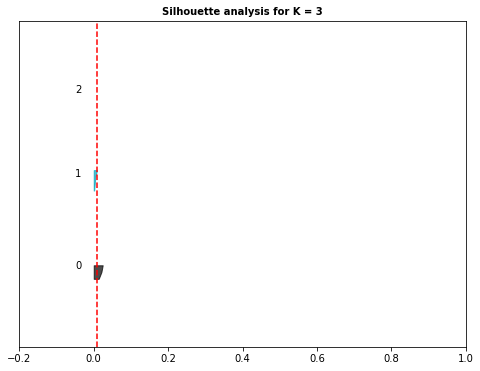

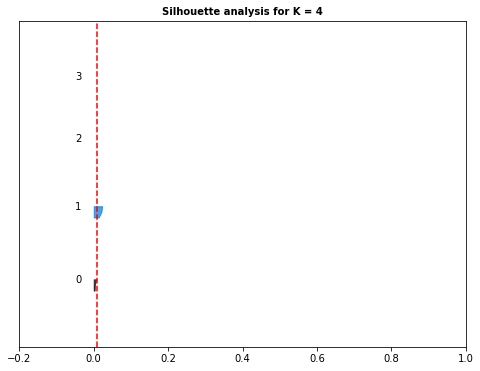

In [73]:
silhouette(kmeans_results, final_df, plot=True)

In [74]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

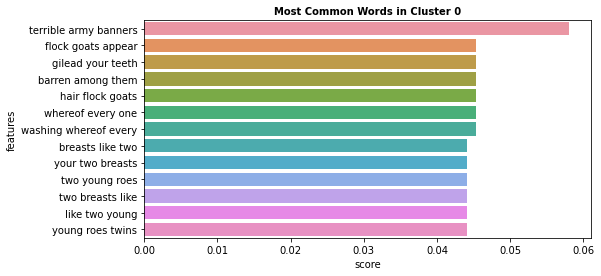

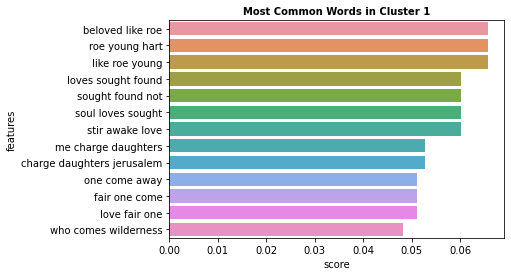

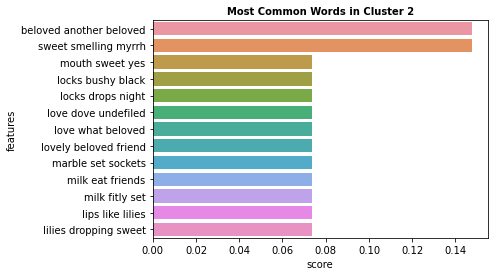

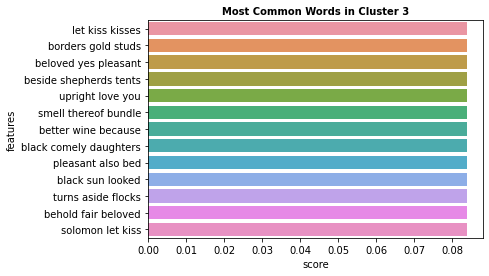

In [75]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [76]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

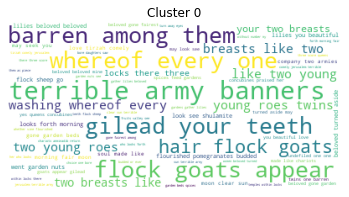

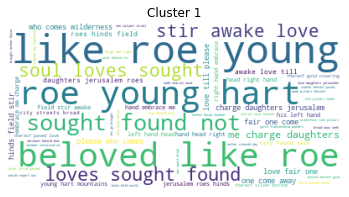

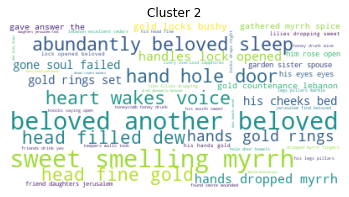

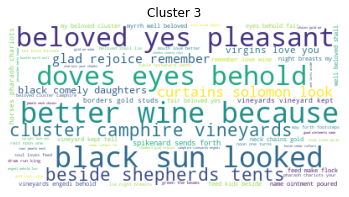

In [77]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [78]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Canticos_1,"'song', 'songs', ',', solomon'.let, 'kiss', 'k...",3
101,Canticos_2,"'rose', 'sharon', ',', 'lily', 'valleys.as', '...",1
102,Canticos_3,"'night', 'bed', 'sought', 'soul', 'loves', ':'...",1
103,Canticos_4,"'behold', ',', 'fair', ',', 'love', ';', 'beho...",0
104,Canticos_5,"'come', 'garden', ',', 'sister', ',', 'spouse'...",2


In [79]:
print(df)

          Autor                                              Livro  label
100  Canticos_1  'song', 'songs', ',', solomon'.let, 'kiss', 'k...      3
101  Canticos_2  'rose', 'sharon', ',', 'lily', 'valleys.as', '...      1
102  Canticos_3  'night', 'bed', 'sought', 'soul', 'loves', ':'...      1
103  Canticos_4  'behold', ',', 'fair', ',', 'love', ';', 'beho...      0
104  Canticos_5  'come', 'garden', ',', 'sister', ',', 'spouse'...      2
105  Canticos_6  'beloved', 'gone', ',', 'fairest', 'among', 'w...      0
106  Canticos_7  'beautiful', 'feet', 'shoes', ',', 'prince', '...      0
107  Canticos_8  'brother', ',', 'sucked', 'breasts', 'mother',...      1
